In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Daten

Datensatz:

Anzahl Bilder: 1797
Bildgröße (Pixel): 8 * 8


Beispielbild:

Label: 1
Daten: [[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]] 




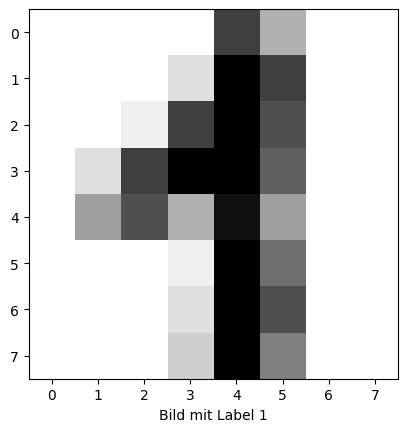

In [2]:
# Lade zunächst einen Datensatz, der Bilder von handschriftlichen Ziffern
# enthält.
ziffern_datensatz = datasets.load_digits()
ziffern_bilder = ziffern_datensatz.images
ziffern_labels = ziffern_datensatz.target

# Der Datensatz enthält 1797 Bilder und jedes Bild hat 8 * 8 = 64 Pixel.
print("Datensatz:\n")
print("Anzahl Bilder:", len(ziffern_labels))
print("Bildgröße (Pixel):", len(ziffern_bilder[0]), '*',
      len(ziffern_bilder[0][0]))

# Gebe das Label und die Pixeldaten des 42-ten Bilds aus.
# Dieses Bild stellt die Ziffer 1 dar, wie auch im Schaubild ersichtlich ist.
ziffer_nummer = 42
print("\n\nBeispielbild:\n")
print("Label:", ziffern_labels[ziffer_nummer])
print("Daten:", ziffern_bilder[ziffer_nummer], "\n\n")
fig, ax = plt.subplots()
ax.set_xlabel("Bild mit Label " + str(ziffern_labels[ziffer_nummer]))
ax.imshow(ziffern_bilder[ziffer_nummer], cmap=plt.cm.gray_r)
plt.show()

In [3]:
ziffern_datensatz = datasets.load_digits()
ziffern_bilder = ziffern_datensatz.images
ziffern_labels = ziffern_datensatz.target

# Der Datensatz enthält 1797 Bilder und jedes Bild hat 8 * 8 = 64 Pixel.
print("Datensatz:\n")
print("Anzahl Bilder:", len(ziffern_labels))
print("Bildgröße (Pixel):", len(ziffern_bilder[0]), '*',
      len(ziffern_bilder[0][0]))

Datensatz:

Anzahl Bilder: 1797
Bildgröße (Pixel): 8 * 8


# Aufteilen der Daten in Trainings- und Testdaten



Beispielbild:

Label: 1
Daten: [[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]] 




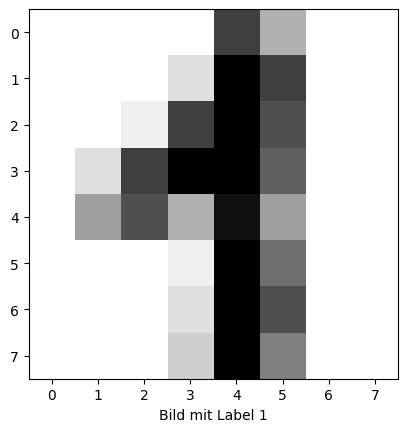

In [4]:
ziffer_nummer = 42
print("\n\nBeispielbild:\n")
print("Label:", ziffern_labels[ziffer_nummer])
print("Daten:", ziffern_bilder[ziffer_nummer], "\n\n")
fig, ax = plt.subplots()
ax.set_xlabel("Bild mit Label " + str(ziffern_labels[ziffer_nummer]))
ax.imshow(ziffern_bilder[ziffer_nummer], cmap=plt.cm.gray_r)
plt.show()

In [5]:
# Da die Klassifizierer mit eindimensionalen Datensätzen arbeiten, müssen wir
# die Bilder zunächst so umbauen, dass alle 64 Pixel in einer langen Reihe sind.
ziffern_bilder = ziffern_bilder.reshape((len(ziffern_bilder), -1))

# Jetzt wird der Datensatz in einen Trainings und einen Testanteil aufgeteilt.
# Dazu werden die Daten und Labels an denselben Stellen aufgeteilt, sodass die
# Zuordnung erhalten bleibt. Mit dem Parameter "test_size" wird festgelegt, wie
# groß der Anteil der Testdaten im Verhältnis zu den Trainingsdaten ist. Häufig
# verwendet man hier den Wer 0.3 (70% Trainingsdaten und 30% Testdaten). Mit dem
# Parameter "shuffle" wird definiert, ob die Daten beim Aufteilen auch
# durcheinander gewürfelt werden, oder ob sie ihre Reihenfole behalten. In
# diesem Beispiel kann man die Daten durchwürfeln. Für andere Daten kann es
# sein, dass man sie durchwürfeln oder sie in der Originalreihenfolge verwenden
# muss. Mit dem Parameter "random_state" wird der Zufallsgenerator beim
# Durchwürfeln initialisiert, so dass jedes Mal dieselbe pseudozufällige
# Reihenfolge herauskommt.
X_train, X_test, y_train, y_test = train_test_split(
    ziffern_bilder, ziffern_labels, test_size=0.3, shuffle=True, random_state=42
)

print("Anzahl Trainingsdaten: ", len(X_train))
print("Anzahl Testdaten: ", len(X_test))

Anzahl Trainingsdaten:  1257
Anzahl Testdaten:  540


In [6]:
ziffern_bilder = ziffern_bilder.reshape((len(ziffern_bilder), -1))

## Training

In [7]:
# Jetzt wird ein Klassifizierer erstellt. Hier wird ein k-Nächste-Nachbarn-
# Klassifizierer verwendet mit k = 5. Man
k = 5
klassifizierer = neighbors.KNeighborsClassifier(n_neighbors=k)

# Der Klassifizierer wird auf den Trainingsdaten mit den Trainingslabels
# trainiert.
klassifizierer.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    ziffern_bilder, ziffern_labels, test_size=0.3, shuffle=True, random_state=42
)



Evaluation nach dem Training:

Echtes Label: 0
Vorhergesagtes Label: 0


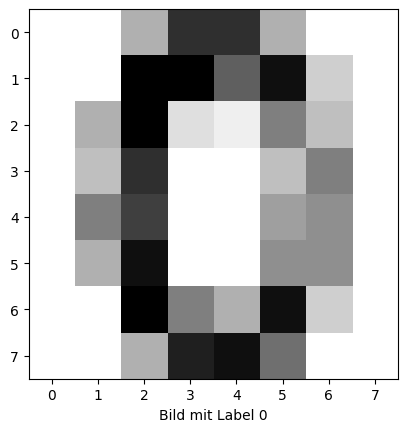

In [9]:
# Auf den Testdaten wird nun die Vorhersage des Klassifizierers mit den "echten"
# Labels ("ground truth") verglichen, um die Leistungsfähigkeit des
# Klassifizierers zu bewerten.

# Verwende den gerade trainierten Klassifizierer, um von allen Bildern in den
# Testdaten die abgebildete Zahl vorherzusagen.
ziffern_vorhersagen = klassifizierer.predict(X_test)

# Vergleiche die Vorhersage mit dem echten Label für eine der Zahlen. Die
# Vorhersage stimmt mit dem Label überein, was auch gewollt ist.
ziffer_nummer = 55
print("\n\nEvaluation nach dem Training:\n")
print("Echtes Label:", y_test[ziffer_nummer])
print("Vorhergesagtes Label:", ziffern_vorhersagen[ziffer_nummer])
fig, ax = plt.subplots()
ax.set_xlabel("Bild mit Label " + str(y_test[ziffer_nummer]))
ax.imshow(X_test[ziffer_nummer].reshape((8, 8)), cmap=plt.cm.gray_r)
plt.show()

In [10]:
k = 5
klassifizierer = neighbors.KNeighborsClassifier(n_neighbors=k)


In [11]:
# Jetzt können Metriken berechnet und angezeigt werden, wie gut das Modell die
# Bilder klassifiziert. In der untersten Zeile siehst du, dass das Modell einen
print("Leistungsfähigkeit des Klassifizierers")
print("F1-Score:",
      metrics.f1_score(y_test, ziffern_vorhersagen, average='macro'))

Leistungsfähigkeit des Klassifizierers
F1-Score: 0.9932926951491272


## Confusion Matrix

In [12]:
klassifizierer.fit(X_train, y_train)

KNeighborsClassifier()

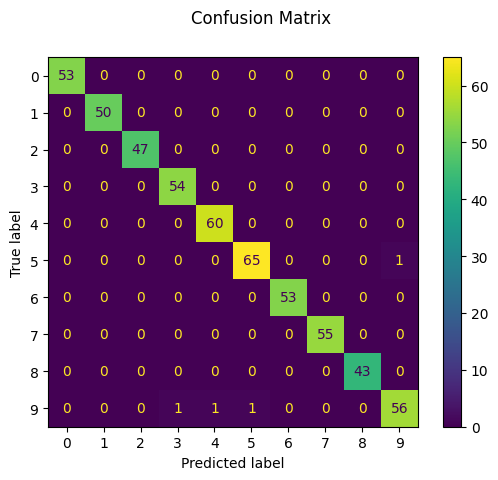

In [13]:
# Man kann auch noch eine sogenannte "Confusion Matrix" ("Verwechslungsmatrix")
# zeichnen, die anzeigt, welche Fehler das Modell beim Klassifizieren macht.
m = metrics.ConfusionMatrixDisplay.from_predictions(y_test, ziffern_vorhersagen)
m.figure_.suptitle("Confusion Matrix")
plt.show()

# Evaluation

In [14]:
ziffern_vorhersagen = klassifizierer.predict(X_test)



Evaluation nach dem Training:

Echtes Label: 0
Vorhergesagtes Label: 0


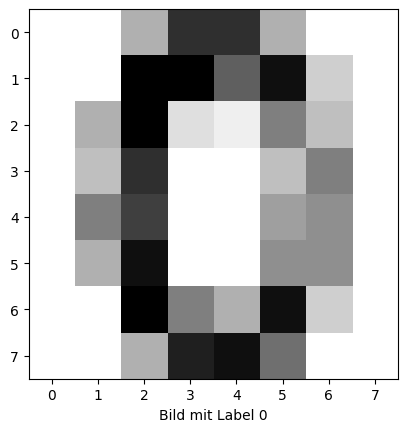

In [15]:
ziffer_nummer = 55
print("\n\nEvaluation nach dem Training:\n")
print("Echtes Label:", y_test[ziffer_nummer])
print("Vorhergesagtes Label:", ziffern_vorhersagen[ziffer_nummer])
fig, ax = plt.subplots()
ax.set_xlabel("Bild mit Label " + str(y_test[ziffer_nummer]))
ax.imshow(X_test[ziffer_nummer].reshape((8, 8)), cmap=plt.cm.gray_r)
plt.show()

In [16]:
print("Leistungsfähigkeit des Klassifizierers")
print("F1-Score:",
      metrics.f1_score(y_test, ziffern_vorhersagen, average='macro'))

Leistungsfähigkeit des Klassifizierers
F1-Score: 0.9932926951491272


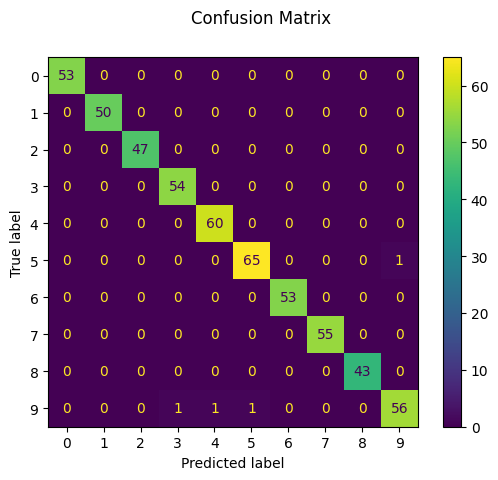

In [17]:
m = metrics.ConfusionMatrixDisplay.from_predictions(y_test, ziffern_vorhersagen)
m.figure_.suptitle("Confusion Matrix")
plt.show()

# Andere Klassifizierer neben dem k-Nächste-Nachbarn-Klassifizierer

In [18]:
from sklearn import datasets
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [19]:
ziffern_datensatz = datasets.load_digits()
ziffern_bilder = ziffern_datensatz.images
ziffern_labels = ziffern_datensatz.target

In [20]:
ziffern_bilder = ziffern_bilder.reshape((len(ziffern_bilder), -1))
X_train, X_test, y_train, y_test = train_test_split(
    ziffern_bilder, ziffern_labels, test_size=0.3, shuffle=True, random_state=42
)



Evaluation nach dem Training:

Echtes Label: 5
Vorhergesagtes Label: 5


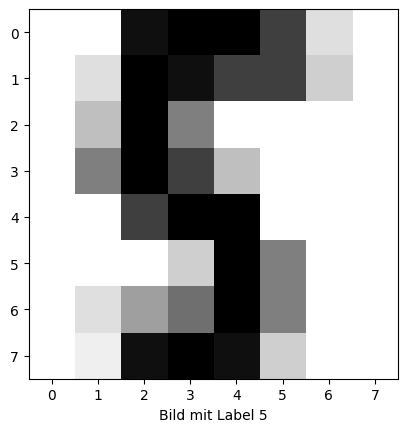

In [23]:
# Auf den Testdaten wird nun die Vorhersage des Klassifizierers mit den "echten"
# Labels ("ground truth") verglichen, um die Leistungsfähigkeit des
# Klassifizierers zu bewerten.

# Verwende den gerade trainierten Klassifizierer, um von allen Bildern in den
# Testdaten die abgebildete Zahl vorherzusagen.
ziffern_vorhersagen = klassifizierer.predict(X_test)

# Vergleiche die Vorhersage mit dem echten Label für eine der Zahlen. Die
# Vorhersage stimmt mit dem Label überein, was auch gewollt ist.
ziffer_nummer = 53
print("\n\nEvaluation nach dem Training:\n")
print("Echtes Label:", y_test[ziffer_nummer])
print("Vorhergesagtes Label:", ziffern_vorhersagen[ziffer_nummer])
fig, ax = plt.subplots()
ax.set_xlabel("Bild mit Label " + str(y_test[ziffer_nummer]))
ax.imshow(X_test[ziffer_nummer].reshape((8, 8)), cmap=plt.cm.gray_r)
plt.show()